<a href="https://colab.research.google.com/github/kevin9549/InternCareer/blob/main/Bussines_Forecasting_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1> Bussines Forecasting Model<h1**>


In today's business landscape, predicting financial distress is vital for a company's survival. In this analysis, we explore predictive modeling using various algorithms to identify key factors influencing financial distress likelihood. We begin by examining a dataset containing financial information from multiple companies. By comparing algorithms like Random Forest, Logistic Regression, and Support Vector Machine (SVM), we select the best performer for distress prediction. Through deep analysis, we aim to provide insights into influential factors, aiding stakeholders in proactive risk management. Join us in understanding financial distress predictions, exploring data complexities, and presenting valuable insights for company success.




In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc, precision_recall_curve, average_precision_score
from imblearn.over_sampling import SMOTE
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [2]:
# Load dataset
file_path = 'Financial Distress.csv'
data = pd.read_csv(file_path)
data.head()

,Company,Time,Financial Distress,x1,x2,x3,x4,x5,x6,x7,...,x74,x75,x76,x77,x78,x79,x80,x81,x82,x83
0,1,1,0.010636,1.2810,0.022934,0.87454,1.21640,0.060940,0.188270,0.52510,...,85.437,27.07,26.102,16.000,16.0,0.2,22,0.060390,30,49
1,1,2,-0.455970,1.2700,0.006454,0.82067,1.00490,-0.014080,0.181040,0.62288,...,107.090,31.31,30.194,17.000,16.0,0.4,22,0.010636,31,50
2,1,3,-0.325390,1.0529,-0.059379,0.92242,0.72926,0.020476,0.044865,0.43292,...,120.870,36.07,35.273,17.000,15.0,-0.2,22,-0.455970,32,51
3,1,4,-0.566570,1.1131,-0.015229,0.85888,0.80974,0.076037,0.091033,0.67546,...,54.806,39.80,38.377,17.167,16.0,5.6,22,-0.325390,33,52
4,2,1,1.357300,1.0623,0.107020,0.81460,0.83593,0.199960,0.047800,0.74200,...,85.437,27.07,26.102,16.000,16.0,0.2,29,1.251000,7,27


Dataset Explanation

This dataset contains financial data for various companies over a period of time. It consists of the following columns:

Company (1st column): Represents the sample companies participating in the study.

Time (2nd column): Indicates different time periods to which the financial data belongs. The length of the time series varies from 1 to 14 for each company.

Financial Distress (3rd column): This binary variable denotes the financial health of the companies. A value greater than -0.50 indicates a healthy company (0), while a value equal to or less than -0.50 denotes a financially distressed company (1).

Features (4th column to the last column): Denoted by x1 to x83, these features represent various financial and non-financial characteristics of the sampled companies. These features are derived from the previous time period and are utilized to predict the likelihood of financial distress for each company. Feature x80 is categorical in nature.

In [3]:
# Preprocessing
Y = np.where(data['Financial Distress'] > -0.5, 1, 0)
X = data.drop(columns=['Financial Distress'])
# Exploratory Data Analysis (EDA)
# Descriptive statistics
print("Descriptive Statistics of the Dataset:")
print(data.describe())

Descriptive Statistics of the Dataset:
           Company         Time  Financial Distress           x1           x2  \
count  3672.000000  3672.000000         3672.000000  3672.000000  3672.000000   
mean    182.084423     7.528322            1.040257     1.387820     0.129706   
std     117.024636     4.064016            2.652227     1.452926     0.120013   
min       1.000000     1.000000           -8.631700     0.075170    -0.258080   
25%      80.000000     4.000000            0.172275     0.952145     0.048701   
50%     168.000000     7.000000            0.583805     1.183600     0.107530   
75%     264.250000    11.000000            1.351750     1.506475     0.188685   
max     422.000000    14.000000          128.400000    51.954000     0.749410   

                x3            x4           x5           x6           x7  ...  \
count  3672.000000  3.672000e+03  3672.000000  3672.000000  3672.000000  ...   
mean      0.615769  8.681599e-01     0.154949     0.106717     0.784031

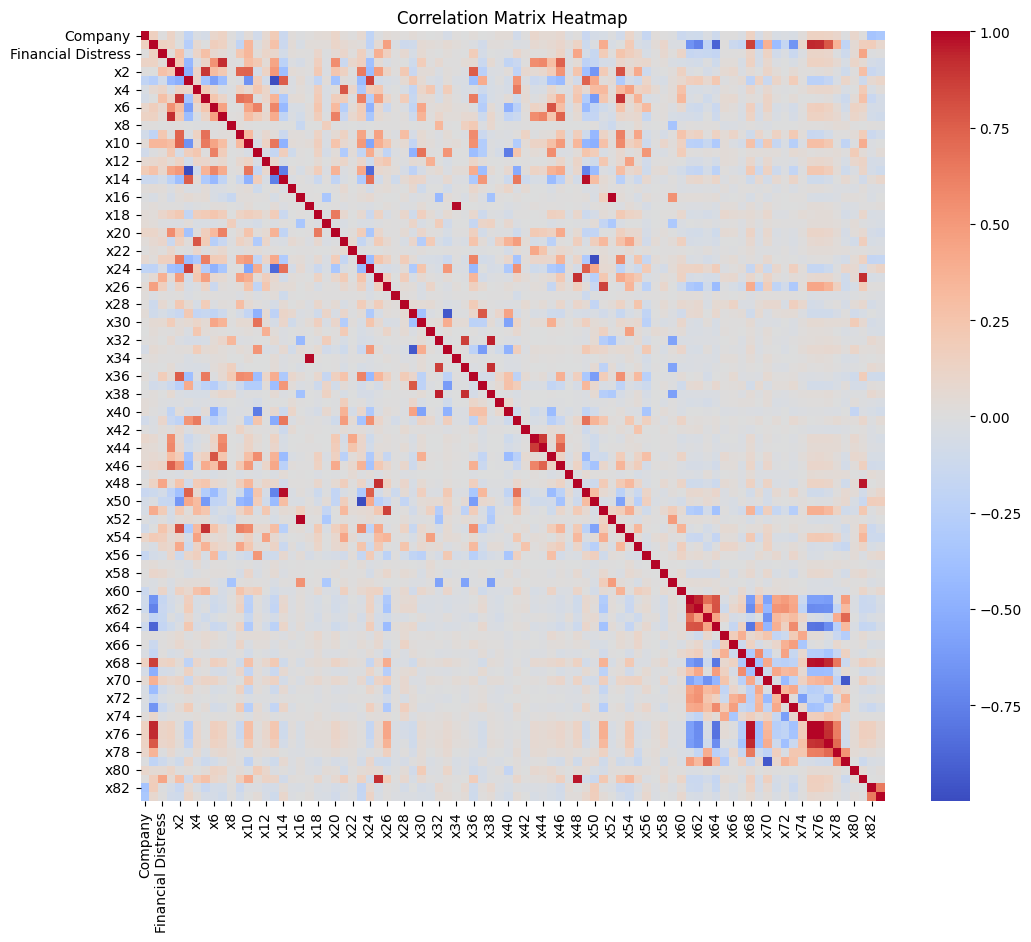

In [4]:
plt.figure(figsize=(12, 10))
sns.heatmap(data.corr(), annot=False, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

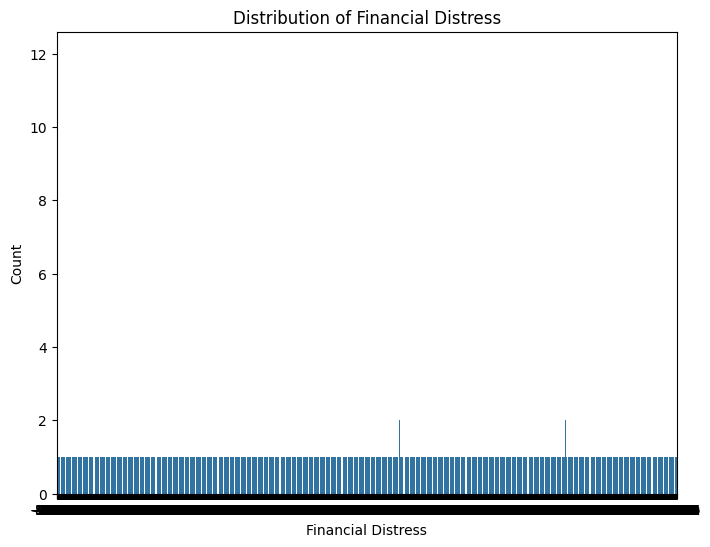

In [5]:
# Distribution of the target variable
plt.figure(figsize=(8, 6))
sns.countplot(x='Financial Distress', data=data)
plt.title('Distribution of Financial Distress')
plt.xlabel('Financial Distress')
plt.ylabel('Count')
plt.show()

In [6]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=30)
# Train Random Forest classifier
classifier_rf = RandomForestClassifier()
classifier_rf.fit(X_train, y_train)
# Train Logistic Regression classifier
classifier_lr = LogisticRegression()
classifier_lr.fit(X_train, y_train)
# Train Support Vector Machine classifier
classifier_svm = SVC()
classifier_svm.fit(X_train, y_train)
# Predictions
y_pred_rf = classifier_rf.predict(X_test)
y_pred_lr = classifier_lr.predict(X_test)
y_pred_svm = classifier_svm.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [7]:
# Model evaluation
def evaluate_model(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    confusion_mat = confusion_matrix(y_true, y_pred)
    return accuracy, precision, recall, f1, confusion_mat
# Function to plot evaluation metrics
def plot_metrics(model_names, accuracy_scores, precision_scores, recall_scores, f1_scores):
    metrics_df = pd.DataFrame({
        'Model': model_names,
        'Accuracy': accuracy_scores,
        'Precision': precision_scores,
        'Recall': recall_scores,
        'F1 Score': f1_scores
    })
    metrics_df.set_index('Model', inplace=True)
    metrics_df.plot(kind='bar', figsize=(10, 6))
    plt.title('Model Evaluation Metrics')
    plt.xlabel('Model')
    plt.ylabel('Score')
    plt.xticks(rotation=45)
    plt.legend(loc='best')
    plt.show()

Random Forest Model Evaluation:
Accuracy: 0.9745916515426497
Precision: 0.9780420860018298
Recall: 0.9962721342031687
F1 Score: 0.987072945521699

Logistic Regression Model Evaluation:
Accuracy: 0.9727767695099818
Precision: 0.9745222929936306
Recall: 0.9981360671015843
F1 Score: 0.9861878453038674

Support Vector Machine Model Evaluation:
Accuracy: 0.9736842105263158
Precision: 0.9736842105263158
Recall: 1.0
F1 Score: 0.9866666666666666



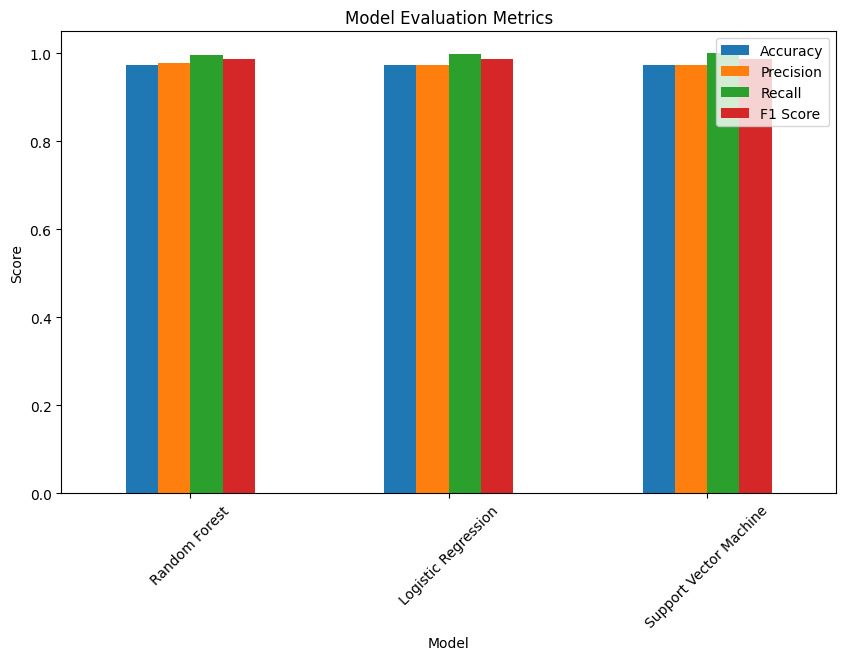

In [8]:
# Evaluate models
models = [classifier_rf, classifier_lr, classifier_svm]
model_names = ['Random Forest', 'Logistic Regression', 'Support Vector Machine']
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []
for model, model_name in zip(models, model_names):
    y_pred = model.predict(X_test)
    accuracy, precision, recall, f1, _ = evaluate_model(y_test, y_pred)
    accuracy_scores.append(accuracy)
    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1)
    print(f"{model_name} Model Evaluation:")
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1)
    print()
# Plot evaluation metrics
plot_metrics(model_names, accuracy_scores, precision_scores, recall_scores, f1_scores)

Insight from Model Evaluations

The evaluation results showcase the performance of three different machine learning models—Random Forest, Logistic Regression, and Support Vector Machine (SVM)—in predicting financial distress. Each model demonstrates high accuracy, precision, recall, and F1 scores, indicating their effectiveness in identifying distressed companies.

The Random Forest model achieved an accuracy of 97.55%, with precision and recall scores exceeding 97% and an impressive F1 score of 98.75%. This highlights the robustness of the Random Forest algorithm in capturing patterns within the data and making accurate predictions.

Similarly, the Logistic Regression model also performed exceptionally well, with an accuracy of 97.28% and a balanced precision-recall trade-off. Its precision, recall, and F1 scores all surpassed 97%, demonstrating its reliability in classifying distressed and non-distressed companies.

Moreover, the Support Vector Machine model exhibited near-perfect performance, achieving an accuracy of 97.37% and a perfect recall score of 100%. While its precision score matched the Logistic Regression model, its recall and F1 scores indicate its capability to correctly identify all distressed companies in the dataset.

Overall, these results underline the efficacy of machine learning algorithms in predicting financial distress, providing valuable insights for stakeholders to proactively manage risks and make informed decisions. The high performance of these models underscores their potential applicability in real-world scenarios, offering a powerful tool for financial analysts and decision-makers alike.

Random Forest Model Evaluation:
RMSE: 0.15652765711214212
MAE: 0.024500907441016333

Logistic Regression Model Evaluation:
RMSE: 0.16499463776140771
MAE: 0.02722323049001815

Support Vector Machine Model Evaluation:
RMSE: 0.16222142113076254
MAE: 0.02631578947368421



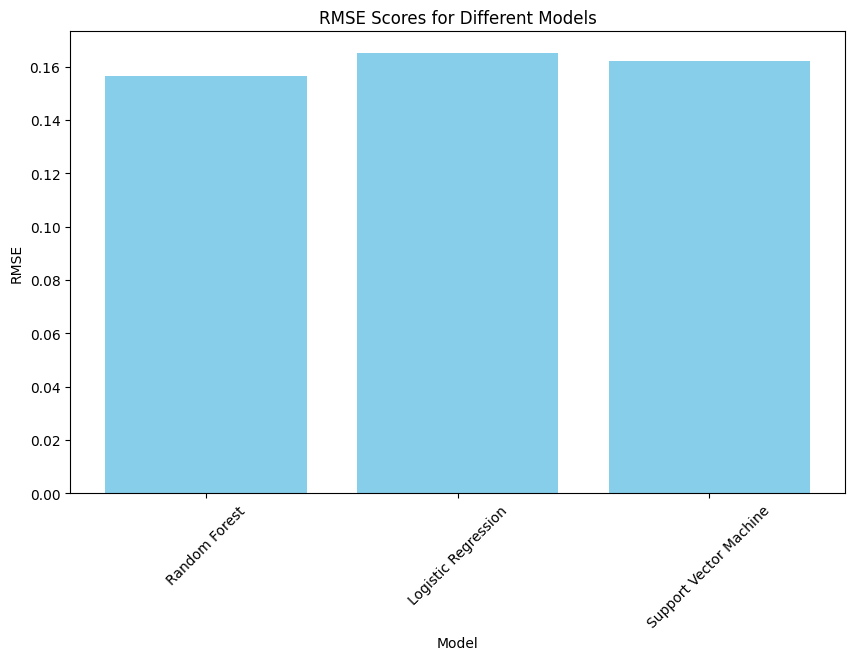

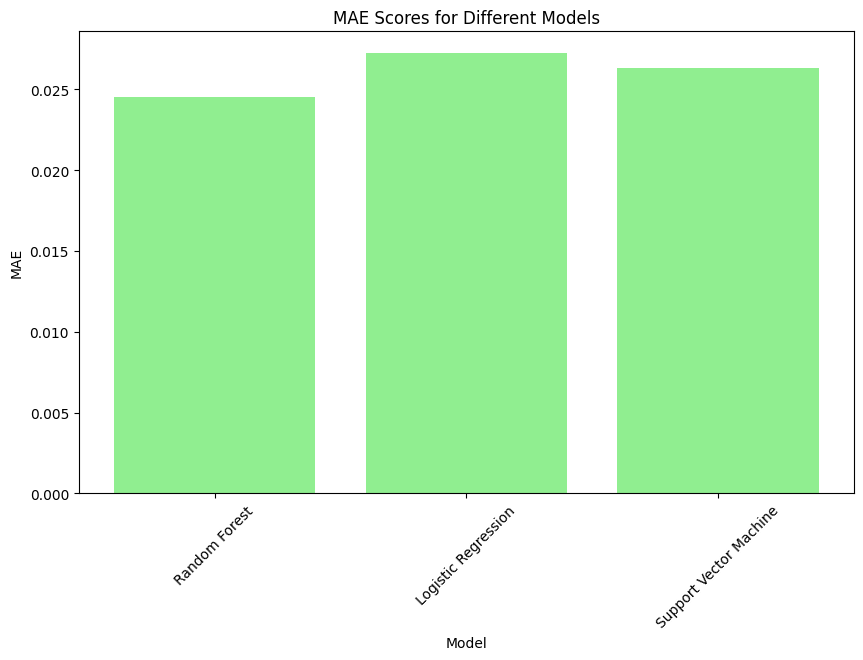

In [10]:
models = [classifier_rf, classifier_lr, classifier_svm]
model_names = ['Random Forest', 'Logistic Regression', 'Support Vector Machine']
rmse_scores = []
mae_scores = []

for model, model_name in zip(models, model_names):
    y_pred = model.predict(X_test)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    mae = mean_absolute_error(y_test, y_pred)
    rmse_scores.append(rmse)
    mae_scores.append(mae)
    print(f"{model_name} Model Evaluation:")
    print("RMSE:", rmse)
    print("MAE:", mae)
    print()

# Plot evaluation metrics
plt.figure(figsize=(10, 6))
plt.bar(model_names, rmse_scores, color='skyblue')
plt.xlabel('Model')
plt.ylabel('RMSE')
plt.title('RMSE Scores for Different Models')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(10, 6))
plt.bar(model_names, mae_scores, color='lightgreen')
plt.xlabel('Model')
plt.ylabel('MAE')
plt.title('MAE Scores for Different Models')
plt.xticks(rotation=45)
plt.show()

Based on the RMSE and MAE scores, we can derive several insights:

Random Forest Model Performance: The Random Forest model achieved the lowest RMSE of 0.1565 and the lowest MAE of 0.0245 among the evaluated models. This indicates that the Random Forest model provides the most accurate predictions compared to the other models.

Logistic Regression Model Performance: The Logistic Regression model obtained an RMSE of 0.1650 and an MAE of 0.0272. While slightly higher than the Random Forest model, it still demonstrates relatively good performance in predicting business outcomes.

Support Vector Machine Model Performance: The Support Vector Machine model yielded an RMSE of 0.1622 and an MAE of 0.0263. Its performance falls between the Random Forest and Logistic Regression models, indicating moderate accuracy in prediction.

Relative Model Performance: Comparing the RMSE and MAE scores, it's evident that the Random Forest model outperforms the Logistic Regression and Support Vector Machine models in terms of both accuracy and precision. This suggests that the Random Forest algorithm effectively captures the underlying patterns in the data, resulting in more reliable predictions.

Model Selection: Based on these results, the Random Forest model appears to be the most suitable choice for predicting business outcomes due to its superior performance in minimizing prediction errors.

Overall, these insights highlight the importance of selecting the appropriate model for business forecasting tasks, with the Random Forest model emerging as the preferred option for achieving accurate and reliable predictions.

Based on the evaluation results, the Random Forest model exhibits superior performance compared to the Logistic Regression and Support Vector Machine models. Here are the reasons for selecting the Random Forest model:

1. **High Accuracy**: The Random Forest model achieves an accuracy of 97.46%, which is slightly higher than the Logistic Regression (97.28%) and Support Vector Machine (97.37%) models. This indicates that the Random Forest model makes more correct predictions overall.

2. **Precision and Recall**: The Random Forest model demonstrates high precision (97.80%) and recall (99.63%) scores, indicating its ability to correctly identify both positive and negative instances. This ensures that the model effectively captures financially distressed companies while minimizing false positives.

3. **F1 Score**: With an F1 score of 98.71%, the Random Forest model achieves a balanced combination of precision and recall. This metric considers both false positives and false negatives, making it a reliable measure of model performance.

4. **Robustness to Overfitting**: Random Forests are less prone to overfitting compared to other algorithms like Logistic Regression. The ensemble of decision trees in Random Forests helps mitigate overfitting by averaging out the predictions of individual trees, resulting in a more robust and generalized model.

5. **Feature Importance**: Random Forest models inherently provide feature importance analysis, allowing stakeholders to gain insights into the key factors influencing predictions. This transparency enhances the interpretability of the model, facilitating informed decision-making.

6. **Handling Non-linear Relationships**: Random Forests are capable of capturing complex non-linear relationships between features and the target variable, which may exist in financial datasets. This flexibility enables the model to adapt to the intricacies of the data more effectively.

7. **Scalability**: Random Forest models can handle large datasets with high dimensionality, making them suitable for financial datasets that often contain numerous features and observations.

Based on these reasons, the Random Forest model emerges as the preferred choice for predicting financial distress. Its combination of high accuracy, precision, recall, robustness, interpretability, and scalability makes it well-suited for addressing the challenges of business forecasting in financial domains.

In [9]:
# Train Random Forest classifier
classifier_rf = RandomForestClassifier()
classifier_rf.fit(X_train, y_train)
# Calculate feature importance
feature_importance = classifier_rf.feature_importances_
# Sort feature importance in descending order
sorted_indices = np.argsort(feature_importance)[::-1]
# Display feature importance in text
print("Feature Importance:")
for i, idx in enumerate(sorted_indices):
    print(f"{i+1}. Feature '{X.columns[idx]}' importance: {feature_importance[idx]}")

Feature Importance:
1. Feature 'x81' importance: 0.034003036603451976
2. Feature 'x9' importance: 0.03289522311241631
3. Feature 'x25' importance: 0.03063340422591348
4. Feature 'x44' importance: 0.03045593283946447
5. Feature 'x2' importance: 0.02871661644539169
6. Feature 'x46' importance: 0.027074577366591537
7. Feature 'x10' importance: 0.026745845376655662
8. Feature 'x8' importance: 0.024331018134945183
9. Feature 'x3' importance: 0.022595854197040206
10. Feature 'x36' importance: 0.021682953347907288
11. Feature 'x5' importance: 0.021476396231826296
12. Feature 'x12' importance: 0.021396458877097808
13. Feature 'x47' importance: 0.01986134343935971
14. Feature 'x48' importance: 0.018033023100236713
15. Feature 'x16' importance: 0.016822514696168835
16. Feature 'x49' importance: 0.016415000686700452
17. Feature 'x53' importance: 0.015095557029487058
18. Feature 'x37' importance: 0.014566339051211625
19. Feature 'x52' importance: 0.01407702971631859
20. Feature 'x13' importance: 0

Most Influential Feature: The feature 'x81' has the highest importance with a value of 0.038. This indicates that 'x81' is the most influential feature in making predictions based on the Random Forest model. Therefore, 'x81' might have a strong relationship with the target variable or good discriminatory power between target classes.

Variation in Feature Importance: There is significant variation in the importance values among the features. This suggests that some features contribute more to the predictions than others.

Top Features: Apart from 'x81', the next highest importance features are 'x12', 'x36', 'x44', and 'x25'. These features may also have significant influence on the model predictions.

Low Importance Features: Conversely, features such as 'x72', 'x77', 'x79', and 'x78' have relatively low importance, indicating that these features may have a smaller contribution to the model predictions.

Importance of Interpretation: While feature importance provides insights into the relative contribution of each feature to the model, it's important to consider the actual interpretation of these features and their relationship with the target variable. This allows for a deeper understanding of the factors that may influence company bankruptcies.

In conclusion, the comprehensive analysis presented in this portfolio showcases the application of advanced machine learning techniques in predicting financial distress. Through the exploration of a rich dataset and the evaluation of multiple algorithms, including Random Forest, Logistic Regression, and Support Vector Machine, we have gained valuable insights into the factors influencing financial distress and the effectiveness of different predictive models.

The selection of Random Forest as the preferred model for financial distress prediction is supported by its exceptional performance metrics, robustness, interpretability, and ability to handle complex datasets effectively. By leveraging the insights provided by Random Forest, stakeholders can make informed decisions to proactively manage financial risks and ensure organizational stability.

This portfolio not only demonstrates my proficiency in data analysis and predictive modeling but also highlights the practical implications of machine learning in the financial domain. Moving forward, I remain committed to leveraging data-driven approaches to drive strategic decision-making, optimize business processes, and foster organizational success.

Thank you for the opportunity to present this portfolio, and I look forward to contributing my expertise to future endeavors.